In [121]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [122]:
df = pd.read_excel('imm.xlsx')
df.head()

,SAMPLE_ID,Cancer_type_grouped_2,Cancer_Type2,Cancer_Type,Chemo_before_IO (1:Yes; 0:No),Age,Sex (1:Male; 0:Female),BMI,Stage (1:IV; 0:I-III),Stage at IO start,...,HED,HLA_LOH,MSI (1:Unstable; 0:Stable_Indeterminate),MSI_SCORE,Response (1:Responder; 0:Non-responder),OS_Event,OS_Months,PFS_Event,PFS_Months,RF16_prob
0,8461,Bladder,2,Others,1,73.845311,0,22.5,1,IV,...,10.340700,0,0,0.16,0,1,9.067762,1,3.121150,0.223172
1,8588,Bladder,2,Others,1,68.876112,1,26.9,1,IV,...,4.968692,0,0,0.16,0,1,7.195072,1,2.694045,0.107879
2,8639,Bladder,2,Others,1,38.696783,1,27.3,1,IV,...,6.850829,0,0,0.26,0,1,12.484600,1,1.215606,0.413048
3,8738,Bladder,2,Others,1,77.240246,1,25.7,1,IV,...,3.812155,1,0,1.10,0,1,0.788501,1,0.788501,0.083979
4,8658,Bladder,2,Others,1,53.514031,1,21.5,1,IV,...,3.913444,0,0,0.68,0,1,5.979466,1,1.248460,0.126372


In [123]:
df.shape

(1479, 28)

In [124]:
df.isna().sum()

SAMPLE_ID                                   0
Cancer_type_grouped_2                       0
Cancer_Type2                                0
Cancer_Type                                 0
Chemo_before_IO (1:Yes; 0:No)               0
Age                                         0
Sex (1:Male; 0:Female)                      0
BMI                                         0
Stage (1:IV; 0:I-III)                       0
Stage at IO start                           0
NLR                                         0
Platelets                                   0
HGB                                         0
Albumin                                     0
Drug (1:Combo; 0:PD1/PDL1orCTLA4)           0
Drug_class                                  0
TMB                                         0
FCNA                                        0
HED                                         0
HLA_LOH                                     0
MSI (1:Unstable; 0:Stable_Indeterminate)    0
MSI_SCORE                         

In [125]:
df.duplicated().sum()

0

In [126]:
df['Cancer_Type'].nunique()

3

In [127]:
df['Cancer_Type'].value_counts()

Others      755
NSCLC       538
Melanoma    186
Name: Cancer_Type, dtype: int64

In [128]:
df['Cancer_Type2'].value_counts()

2    755
1    538
0    186
Name: Cancer_Type2, dtype: int64

In [129]:
df.drop(columns=["Cancer_Type2","SAMPLE_ID"],inplace = True)
df.head()

,Cancer_type_grouped_2,Cancer_Type,Chemo_before_IO (1:Yes; 0:No),Age,Sex (1:Male; 0:Female),BMI,Stage (1:IV; 0:I-III),Stage at IO start,NLR,Platelets,...,HED,HLA_LOH,MSI (1:Unstable; 0:Stable_Indeterminate),MSI_SCORE,Response (1:Responder; 0:Non-responder),OS_Event,OS_Months,PFS_Event,PFS_Months,RF16_prob
0,Bladder,Others,1,73.845311,0,22.5,1,IV,7.60,158,...,10.340700,0,0,0.16,0,1,9.067762,1,3.121150,0.223172
1,Bladder,Others,1,68.876112,1,26.9,1,IV,19.29,176,...,4.968692,0,0,0.16,0,1,7.195072,1,2.694045,0.107879
2,Bladder,Others,1,38.696783,1,27.3,1,IV,1.44,147,...,6.850829,0,0,0.26,0,1,12.484600,1,1.215606,0.413048
3,Bladder,Others,1,77.240246,1,25.7,1,IV,12.33,365,...,3.812155,1,0,1.10,0,1,0.788501,1,0.788501,0.083979
4,Bladder,Others,1,53.514031,1,21.5,1,IV,7.64,290,...,3.913444,0,0,0.68,0,1,5.979466,1,1.248460,0.126372


In [130]:
df['Cancer_type_grouped_2'].value_counts()

NSCLC            538
Melanoma         186
Renal             91
Bladder           82
Head & Neck       69
Sarcoma           67
Endometrial       65
Gastric           64
Hepatobiliary     52
SCLC              50
Colorectal        46
Esophageal        44
Pancreatic        35
Mesothelioma      34
Ovarian           31
Breast            25
Name: Cancer_type_grouped_2, dtype: int64

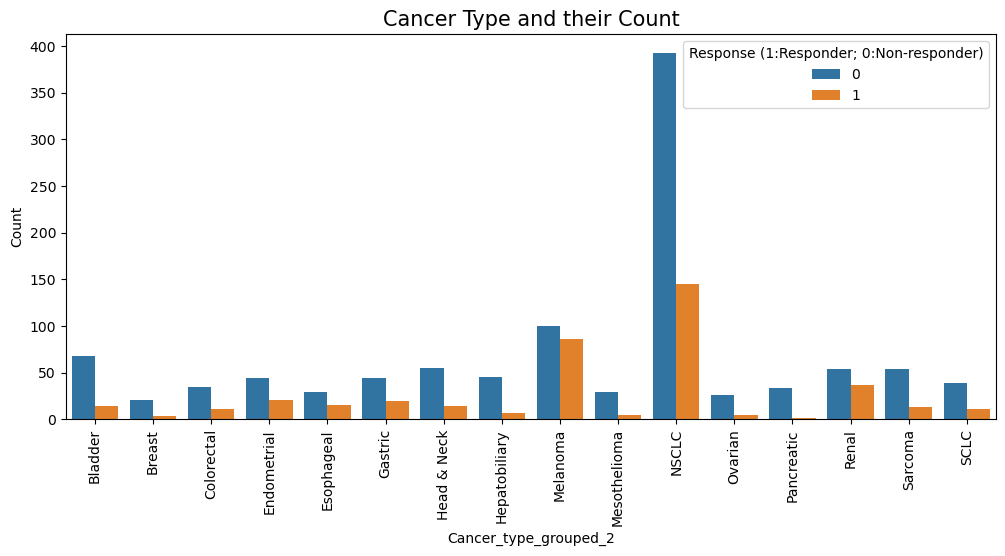

In [131]:
df['Response (1:Responder; 0:Non-responder)'] = df['Response (1:Responder; 0:Non-responder)'].astype(str)

plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(x='Cancer_type_grouped_2', data=df, hue='Response (1:Responder; 0:Non-responder)')
plt.title("Cancer Type and their Count", fontsize=15)
plt.ylabel("Count")
plt.show()

In [132]:
df['Cancer_type_grouped_2'].nunique()

16

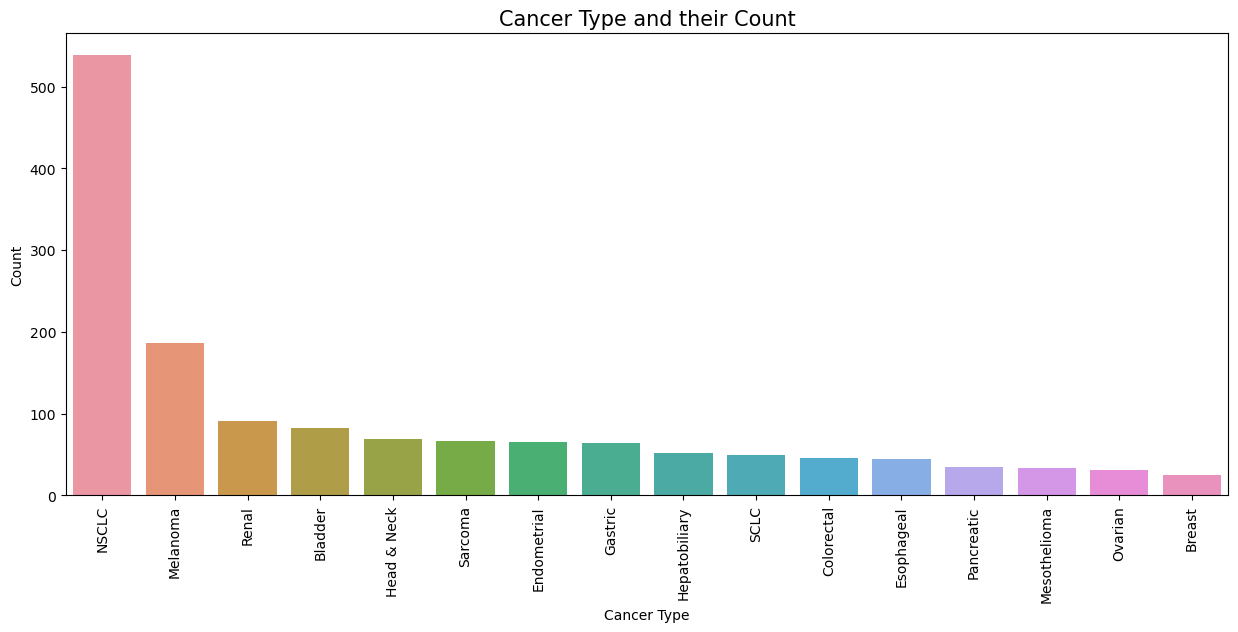

In [133]:
ab = df['Cancer_type_grouped_2'].value_counts()
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x=ab.index, y=ab.values)
plt.title("Cancer Type and their Count",fontsize=15)
plt.ylabel("Count")
plt.xlabel("Cancer Type")
plt.show()


In [134]:
df.columns

Index(['Cancer_type_grouped_2', 'Cancer_Type', 'Chemo_before_IO (1:Yes; 0:No)',
       'Age', 'Sex (1:Male; 0:Female)', 'BMI', 'Stage (1:IV; 0:I-III)',
       'Stage at IO start', 'NLR', 'Platelets', 'HGB', 'Albumin',
       'Drug (1:Combo; 0:PD1/PDL1orCTLA4)', 'Drug_class', 'TMB', 'FCNA', 'HED',
       'HLA_LOH', 'MSI (1:Unstable; 0:Stable_Indeterminate)', 'MSI_SCORE',
       'Response (1:Responder; 0:Non-responder)', 'OS_Event', 'OS_Months',
       'PFS_Event', 'PFS_Months', 'RF16_prob'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancer_type_grouped_2                     1479 non-null   object 
 1   Cancer_Type                               1479 non-null   object 
 2   Chemo_before_IO (1:Yes; 0:No)             1479 non-null   int64  
 3   Age                                       1479 non-null   float64
 4   Sex (1:Male; 0:Female)                    1479 non-null   int64  
 5   BMI                                       1479 non-null   float64
 6   Stage (1:IV; 0:I-III)                     1479 non-null   int64  
 7   Stage at IO start                         1479 non-null   object 
 8   NLR                                       1479 non-null   float64
 9   Platelets                                 1479 non-null   int64  
 10  HGB                                 

In [136]:
df['Stage at IO start'].value_counts()

IV     1382
III      87
II        9
I         1
Name: Stage at IO start, dtype: int64

In [137]:
df['Stage (1:IV; 0:I-III)'].value_counts()

1    1382
0      97
Name: Stage (1:IV; 0:I-III), dtype: int64

In [138]:
df['Drug_class'].value_counts()

PD1/PDL1    1221
Combo        253
CTLA4          5
Name: Drug_class, dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Cancer_type_grouped_2                     1479 non-null   object 
 1   Cancer_Type                               1479 non-null   object 
 2   Chemo_before_IO (1:Yes; 0:No)             1479 non-null   int64  
 3   Age                                       1479 non-null   float64
 4   Sex (1:Male; 0:Female)                    1479 non-null   int64  
 5   BMI                                       1479 non-null   float64
 6   Stage (1:IV; 0:I-III)                     1479 non-null   int64  
 7   Stage at IO start                         1479 non-null   object 
 8   NLR                                       1479 non-null   float64
 9   Platelets                                 1479 non-null   int64  
 10  HGB                                 

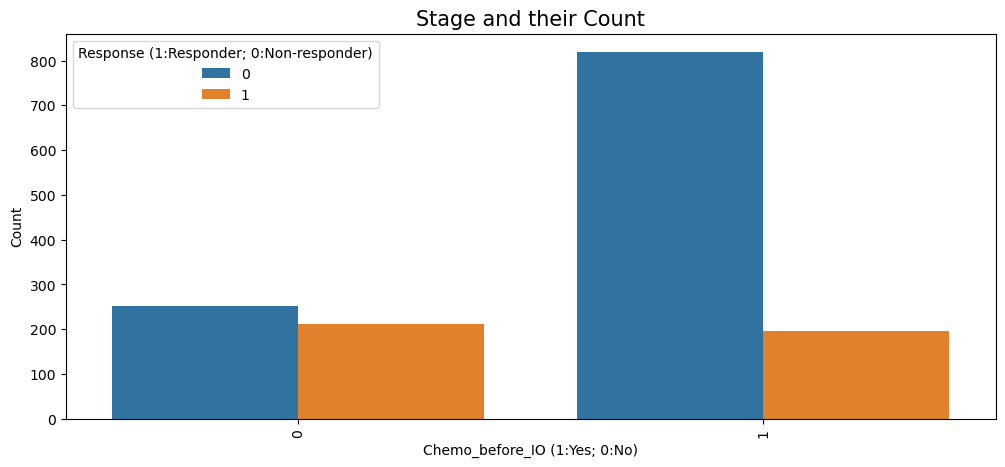

In [140]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(x='Chemo_before_IO (1:Yes; 0:No)', data=df, hue='Response (1:Responder; 0:Non-responder)')
plt.title("Stage and their Count", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Chemo_before_IO (1:Yes; 0:No)")
plt.show()


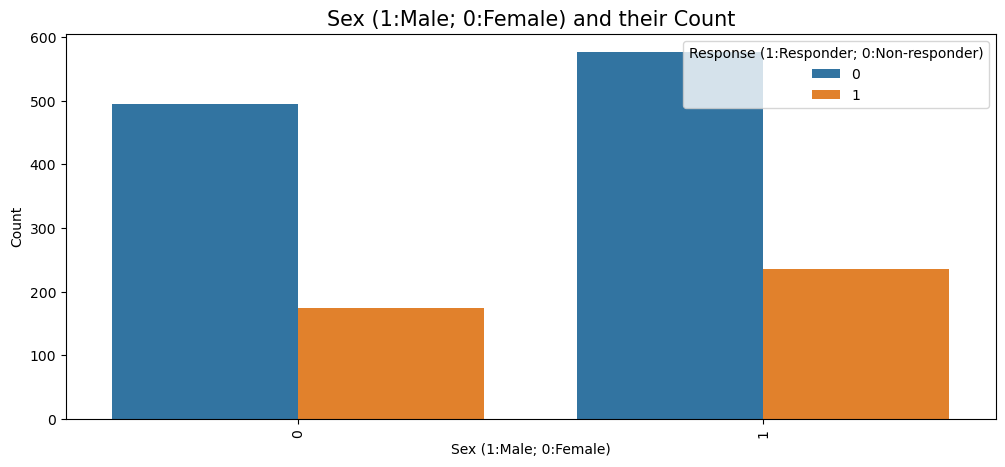

In [141]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(x='Sex (1:Male; 0:Female)', data=df, hue='Response (1:Responder; 0:Non-responder)')
plt.title("Sex (1:Male; 0:Female) and their Count", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Sex (1:Male; 0:Female)")
plt.show()


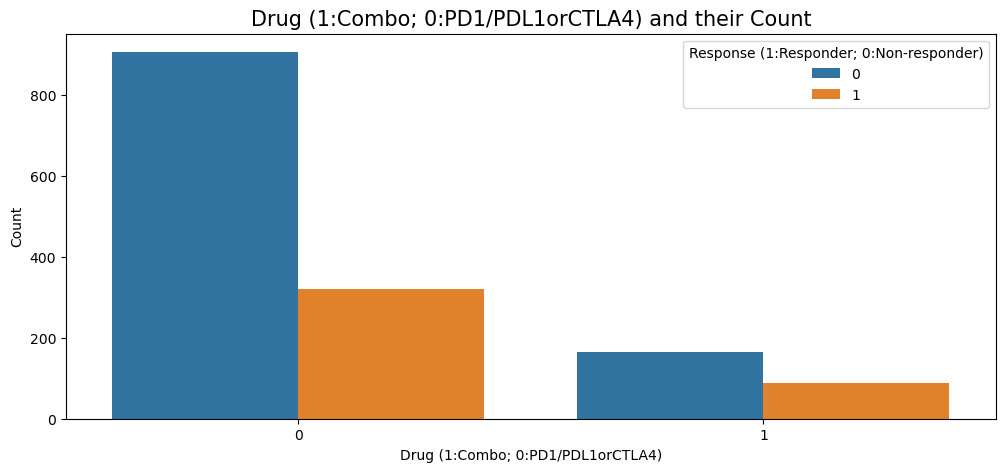

In [142]:
plt.figure(figsize=(12,5))
sns.countplot(x='Drug (1:Combo; 0:PD1/PDL1orCTLA4)', data=df, hue='Response (1:Responder; 0:Non-responder)')
plt.title("Drug (1:Combo; 0:PD1/PDL1orCTLA4) and their Count", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Drug (1:Combo; 0:PD1/PDL1orCTLA4)")
plt.show()

In [143]:
df.shape

(1479, 26)

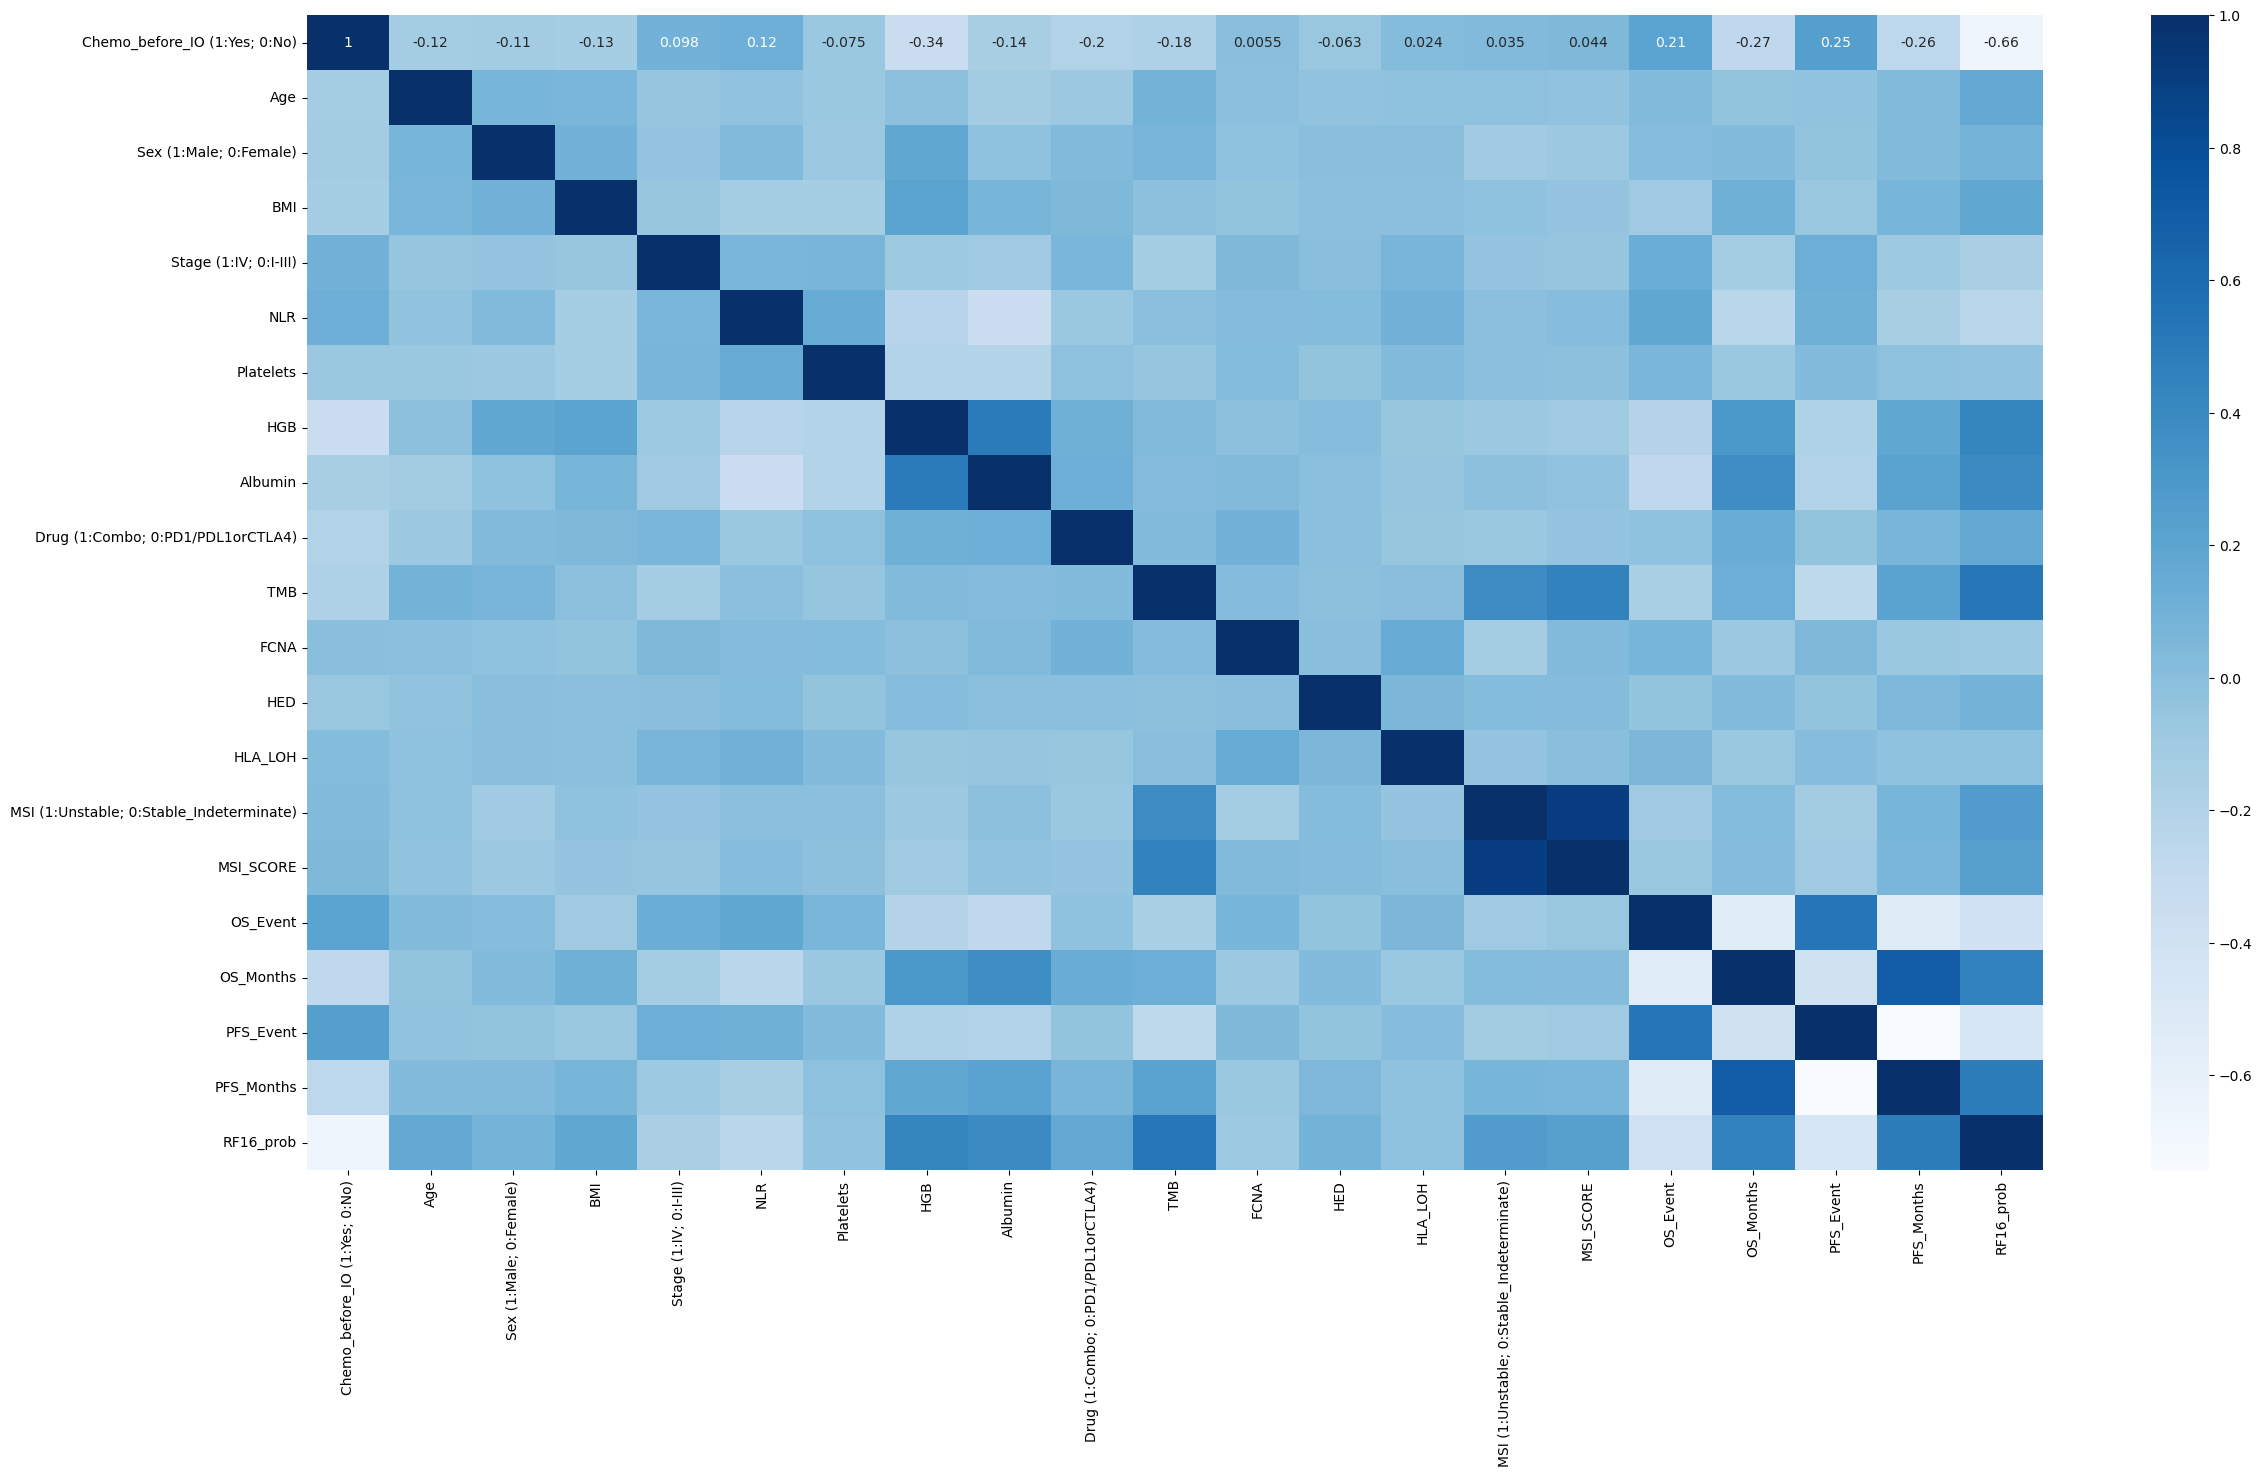

In [144]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(28, 15))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()

In [145]:
df['MSI_SCORE'].describe().T

count    1479.000000
mean        1.401738
std         4.449446
min         0.000000
25%         0.060000
50%         0.270000
75%         1.045000
max        48.280000
Name: MSI_SCORE, dtype: float64

In [146]:
X = df.drop(columns='Response (1:Responder; 0:Non-responder)')
y = df['Response (1:Responder; 0:Non-responder)']

In [147]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming `initial_df` contains representative data with all necessary columns
initial_df = pd.read_excel('imm.xlsx')

# Define columns for numeric and categorical features
numeric_features = ['Chemo_before_IO (1:Yes; 0:No)', 'Age', 'Sex (1:Male; 0:Female)', 'BMI',
                    'Stage (1:IV; 0:I-III)', 'NLR', 'Platelets', 'HGB', 'Albumin',
                    'Drug (1:Combo; 0:PD1/PDL1orCTLA4)', 'TMB', 'FCNA', 'HED', 'HLA_LOH',
                    'MSI (1:Unstable; 0:Stable_Indeterminate)', 'MSI_SCORE', 'OS_Event',
                    'OS_Months', 'PFS_Event', 'PFS_Months', 'RF16_prob']

categorical_features = ['Cancer_type_grouped_2', 'Cancer_Type', 'Stage at IO start', 'Drug_class']

# Define preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

# Fit the preprocessor on the initial dataset
X_initial = initial_df.drop('Response (1:Responder; 0:Non-responder)', axis=1)
preprocessor.fit(X_initial)

# Save the fitted preprocessor for later use
joblib.dump(preprocessor, "preprocessor.joblib")


['preprocessor.joblib']

In [148]:
numeric_features = X.select_dtypes(include='number').columns
numeric_features

Index(['Chemo_before_IO (1:Yes; 0:No)', 'Age', 'Sex (1:Male; 0:Female)', 'BMI',
       'Stage (1:IV; 0:I-III)', 'NLR', 'Platelets', 'HGB', 'Albumin',
       'Drug (1:Combo; 0:PD1/PDL1orCTLA4)', 'TMB', 'FCNA', 'HED', 'HLA_LOH',
       'MSI (1:Unstable; 0:Stable_Indeterminate)', 'MSI_SCORE', 'OS_Event',
       'OS_Months', 'PFS_Event', 'PFS_Months', 'RF16_prob'],
      dtype='object')

In [149]:
categorical_features = X.select_dtypes(exclude='number').columns
categorical_features

Index(['Cancer_type_grouped_2', 'Cancer_Type', 'Stage at IO start',
       'Drug_class'],
      dtype='object')

In [150]:
X_processed, y = preprocess_data(df)

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed,y,test_size = 0.2,random_state=42)

In [152]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

acc_scr_lr = accuracy_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)

print(f"Accuracy Score:{acc_scr_lr} \n Confusion Matrix: \n {cm_lr}")

diff_lr = pd.DataFrame(np.c_[y_test, y_pred],columns = ["Actual value","Predicted value"])
diff_lr

Accuracy Score:0.875 
 Confusion Matrix: 
 [[204  16]
 [ 21  55]]


,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [153]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

acc_scr_dt = accuracy_score(y_test, y_pred_dt)
cm_lr_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy Score:{acc_scr_dt} \n Confusion Matrix: \n {cm_lr_dt}")

diff_dt = pd.DataFrame(np.c_[y_test, y_pred_dt],columns = ["Actual value","Predicted value"])
diff_dt

Accuracy Score:0.8614864864864865 
 Confusion Matrix: 
 [[200  20]
 [ 21  55]]


,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [154]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Initialize the SVC with probability enabled
model = SVC(probability=True)

# Train the model (assuming X_train and y_train are your training data)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'model.joblib')


['model.joblib']

In [155]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

acc_scr_svm = accuracy_score(y_test, y_pred_svm)
cm_lr_svm = confusion_matrix(y_test, y_pred_svm)

print(f"Accuracy Score:{acc_scr_svm} \n Confusion Matrix: \n {cm_lr_svm}")

diff_svm = pd.DataFrame(np.c_[y_test, y_pred_svm],columns = ["Actual value","Predicted value"])
diff_svm

Accuracy Score:0.8885135135135135 
 Confusion Matrix: 
 [[208  12]
 [ 21  55]]


,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [156]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix

acc_scr_rfr = accuracy_score(y_test, y_pred_rfr)
cm_lr_rfr = confusion_matrix(y_test, y_pred_rfr)

print(f"Accuracy Score:{acc_scr_rfr} \n Confusion Matrix: \n {cm_lr_rfr}")

diff_rfr = pd.DataFrame(np.c_[y_test, y_pred_rfr],columns = ["Actual value","Predicted value"])
diff_rfr

Accuracy Score:0.875 
 Confusion Matrix: 
 [[202  18]
 [ 19  57]]


,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [157]:
#! pip install lightgbm


In [77]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate
acc_scr_lgb = accuracy_score(y_test, y_pred_lgb)
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

print(f"Accuracy Score: {acc_scr_lgb}\nConfusion Matrix:\n{cm_lgb}")

diff_lgb = pd.DataFrame(np.c_[y_test, y_pred_lgb],columns = ["Actual value","Predicted value"])
diff_lgb

[LightGBM] [Info] Number of positive: 333, number of negative: 850
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 1183, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.281488 -> initscore=-0.937094
[LightGBM] [Info] Start training from score -0.937094
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Actual value,Predicted value
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [78]:
#! pip install catboost

In [79]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)
cat_model.fit(X_train, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test)

# Evaluate
acc_scr_cat = accuracy_score(y_test, y_pred_cat)
cm_cat = confusion_matrix(y_test, y_pred_cat)

print(f"Accuracy Score: {acc_scr_cat}\nConfusion Matrix:\n{cm_cat}")

diff_cat = pd.DataFrame(np.c_[y_test, y_pred_cat], columns=["Actual value", "Predicted value"])
diff_cat

Accuracy Score: 0.875
Confusion Matrix:
[[198  22]
 [ 15  61]]


,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [80]:
from sklearn.neighbors import KNeighborsClassifier


# Train k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
acc_sc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy Score: {acc_sc_knn}\nConfusion Matrix:\n{cm_knn}")

diff_knn = pd.DataFrame(np.c_[y_test, y_pred_knn], columns=["Actual value", "Predicted value"])
diff_knn

Accuracy Score: 0.8581081081081081
Confusion Matrix:
[[207  13]
 [ 29  47]]


,Actual value,Predicted value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
291,0,0
292,1,0
293,0,0
294,0,0


In [81]:
df.columns

Index(['Cancer_type_grouped_2', 'Cancer_Type', 'Chemo_before_IO (1:Yes; 0:No)',
       'Age', 'Sex (1:Male; 0:Female)', 'BMI', 'Stage (1:IV; 0:I-III)',
       'Stage at IO start', 'NLR', 'Platelets', 'HGB', 'Albumin',
       'Drug (1:Combo; 0:PD1/PDL1orCTLA4)', 'Drug_class', 'TMB', 'FCNA', 'HED',
       'HLA_LOH', 'MSI (1:Unstable; 0:Stable_Indeterminate)', 'MSI_SCORE',
       'Response (1:Responder; 0:Non-responder)', 'OS_Event', 'OS_Months',
       'PFS_Event', 'PFS_Months', 'RF16_prob'],
      dtype='object')

In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Qiskit imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit import Parameter

def preprocess_data(df):
    """Preprocess the immunotherapy dataset."""
    # Separate features and target
    y = df['Response (1:Responder; 0:Non-responder)'].values
    
    # Select numerical features
    numerical_features = [
        'Age', 'BMI', 'NLR', 'Platelets', 'HGB', 'Albumin',
        'TMB', 'FCNA', 'HED', 'HLA_LOH', 'MSI_SCORE',
        'OS_Months', 'PFS_Months', 'RF16_prob'
    ]
    
    # Select categorical features
    categorical_features = [
        'Cancer_type_grouped_2', 'Cancer_Type',
        'Chemo_before_IO (1:Yes; 0:No)', 'Sex (1:Male; 0:Female)',
        'Stage (1:IV; 0:I-III)', 'Stage at IO start',
        'Drug (1:Combo; 0:PD1/PDL1orCTLA4)', 'Drug_class',
        'MSI (1:Unstable; 0:Stable_Indeterminate)',
        'OS_Event', 'PFS_Event'
    ]
    
    # Process numerical features
    X_num = df[numerical_features].values
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(X_num)
    
    # Process categorical features
    X_cat = df[categorical_features].copy()
    le_dict = {}
    for col in categorical_features:
        le = LabelEncoder()
        X_cat[col] = le.fit_transform(X_cat[col].astype(str))
        le_dict[col] = le
    
    # Combine numerical and categorical features
    X = np.hstack((X_num_scaled, X_cat.values))
    
    return X, y, scaler, le_dict

def create_quantum_circuit(n_qubits, n_layers=2):
    """Create a variational quantum circuit for classification."""
    # Feature map circuit
    feature_map = ZZFeatureMap(n_qubits)
    
    # Variational circuit
    var_circuit = RealAmplitudes(n_qubits, reps=n_layers)
    
    # Combine feature map and variational circuit
    qc = QuantumCircuit(n_qubits)
    qc.compose(feature_map, inplace=True)
    qc.compose(var_circuit, inplace=True)
    
    return qc

def create_quantum_classifier(n_features):
    """Create a Variational Quantum Classifier."""
    # Define number of qubits needed
    n_qubits = int(np.ceil(np.log2(n_features)))
    
    # Create quantum circuit
    qc = create_quantum_circuit(n_qubits)
    
    # Define quantum instance
    quantum_instance = QuantumInstance(
        Aer.get_backend('aer_simulator'),
        shots=1024,
        seed_simulator=42,
        seed_transpiler=42
    )
    
    # Define optimizer
    optimizer = SPSA(maxiter=100)
    
    # Create VQC
    vqc = VQC(
        feature_map=qc.feature_map,
        ansatz=qc.var_form,
        optimizer=optimizer,
        quantum_instance=quantum_instance
    )
    
    return vqc

def main(df):
    """Main function to run the quantum ML pipeline."""
    # Preprocess data
    X, y, scaler, le_dict = preprocess_data(df)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Create and train quantum classifier
    vqc = create_quantum_classifier(X.shape[1])
    
    # Fit the model
    vqc.fit(X_train, y_train)
    
    # Make predictions
    y_pred = vqc.predict(X_test)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    
    return vqc, accuracy, scaler, le_dict

# Function to predict for new patients
def predict_new_patient(vqc, patient_data, scaler, le_dict):
    """Predict response for a new patient."""
    # Preprocess new patient data
    processed_data = preprocess_single_patient(patient_data, scaler, le_dict)
    
    # Make prediction
    prediction = vqc.predict([processed_data])[0]
    
    return "Responder" if prediction == 1 else "Non-responder"

def preprocess_single_patient(patient_data, scaler, le_dict):
    """Preprocess single patient data."""
    numerical_features = ['Chemo_before_IO (1:Yes; 0:No)', 'Age', 'Sex (1:Male; 0:Female)', 'BMI',
       'Stage (1:IV; 0:I-III)', 'NLR', 'Platelets', 'HGB', 'Albumin',
       'Drug (1:Combo; 0:PD1/PDL1orCTLA4)', 'TMB', 'FCNA', 'HED', 'HLA_LOH',
       'MSI (1:Unstable; 0:Stable_Indeterminate)', 'MSI_SCORE', 'OS_Event',
       'OS_Months', 'PFS_Event', 'PFS_Months', 'RF16_prob']
    
    categorical_features = ['Cancer_type_grouped_2', 'Cancer_Type', 'Stage at IO start',
       'Drug_class']
    
    # Process numerical features
    num_data = [patient_data[feat] for feat in numerical_features]
    scaled_num_data = scaler.transform([num_data])[0]
    
    # Process categorical features
    cat_data = []
    for feat in categorical_features:
        le = le_dict[feat]
        cat_data.append(le.transform([str(patient_data[feat])])[0])
    
    # Combine features
    processed_data = np.hstack((scaled_num_data, cat_data))
    
    return processed_data

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
# First, install required packages
'''
pip install qiskit qiskit-machine-learning numpy pandas scikit-learn matplotlib seaborn
pip install qiskit[machine-learning]
pip install qiskit-algorithms
'''

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit.algorithms.optimizers import COBYLA

class AdvancedQMLImmunotherapy:
    def __init__(self, feature_reps=2, feature_map_type='zz'):
        self.feature_reps = feature_reps
        self.feature_map_type = feature_map_type
        self.scaler = StandardScaler()
        self.le = LabelEncoder()
        
    def preprocess_data(self, X, y, test_size=0.2):
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Encode labels
        y_train_encoded = self.le.fit_transform(y_train)
        y_test_encoded = self.le.transform(y_test)
        
        return X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded
    
    def create_feature_map(self, num_features):
        if self.feature_map_type == 'zz':
            return ZZFeatureMap(
                feature_dimension=num_features,
                reps=self.feature_reps,
                entanglement='linear'
            )
        else:
            return RealAmplitudes(
                num_qubits=num_features,
                reps=self.feature_reps,
                entanglement='linear'
            )
    
    def create_quantum_kernel(self, feature_map):
        sampler = Sampler()
        fidelity = ComputeUncompute(sampler=sampler)
        return FidelityQuantumKernel(
            feature_map=feature_map,
            fidelity=fidelity
        )
    
    def train_and_evaluate(self, X, y):
        # Preprocess data
        X_train, X_test, y_train, y_test = self.preprocess_data(X, y)
        
        # Create feature map
        num_features = X_train.shape[1]
        feature_map = self.create_feature_map(num_features)
        
        # Create quantum kernel
        quantum_kernel = self.create_quantum_kernel(feature_map)
        
        # Initialize QSVC with optimizer
        optimizer = COBYLA(maxiter=100)
        qsvc = QSVC(
            quantum_kernel=quantum_kernel,
            optimizer=optimizer,
            C=1.0
        )
        
        # Train the model
        print("Training the quantum model...")
        qsvc.fit(X_train, y_train)
        
        # Make predictions
        y_pred = qsvc.predict(X_test)
        y_pred_prob = qsvc.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        accuracy = qsvc.score(X_test, y_test)
        
        # Generate detailed report
        self.generate_report(y_test, y_pred, y_pred_prob)
        
        return qsvc, accuracy
    
    def generate_report(self, y_true, y_pred, y_pred_prob):
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

# Usage example:
if __name__ == "__main__":
    # Assuming df is your DataFrame with 'Response' as target column
    X = df.drop(columns='Response')
    y = df['Response']
    
    # Initialize and run the model
    qml_model = AdvancedQMLImmunotherapy(feature_reps=2, feature_map_type='zz')
    model, accuracy = qml_model.train_and_evaluate(X, y)
    
    print(f"\nFinal Model Accuracy: {accuracy:.4f}")
    

In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-machine-learning
!pip install qiskit[machine-learning]
!pip install qiskit-algorithms

In [ ]:
!pip install qiskit-machine-learning==0.6.1
!pip install qiskit-algorithms==0.2.1

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
# Method 1: Using --default-timeout
!pip install --default-timeout=100 qiskit qiskit-machine-learning qiskit-algorithms

# Method 2: If that doesn't work, try installing with the --index-url flag
!pip install --index-url https://pypi.org/simple qiskit qiskit-machine-learning qiskit-algorithms

# Method 3: Try installing one by one with increased timeout
!pip install --default-timeout=100 qiskit
!pip install --default-timeout=100 qiskit-machine-learning
!pip install --default-timeout=100 qiskit-algorithms

In [ ]:
!conda create -n qml_env python=3.9
!conda activate qml_env



In [ ]:
!python -m venv my_qiskit_env

In [ ]:
!pip install ipykernel
!python -m ipykernel install --user --name=my_qiskit_env --display-name="Python (Qiskit)"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute


X = df.drop(columns='Response')
y = df['Response']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode labels if categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# 2. Define Quantum Feature Map
num_features = X_train.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)

# 3. Create a Sampler for statevector simulation
sampler = Sampler()

# 4. Compute the fidelity using ComputeUncompute
fidelity = ComputeUncompute(sampler=sampler)

# 5. Create the Quantum Kernel
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# 6. Set up and train the QSVC
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)

# 7. Make predictions and evaluate the model
y_pred = qsvc.predict(X_test)
qsvc_score = qsvc.score(X_test, y_test)

print(f"Accuracy Score: {qsvc_score}")

# Display differences
diff = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual value", "Predicted value"])
print(diff)


In [ ]:
!pip uninstall qiskit qiskit-terra qiskit-machine-learning qiskit-algorithms -y

In [ ]:
!conda remove qiskit qiskit-terra qiskit-machine-learning qiskit-algorithms -y

In [ ]:
!pip install scikit-learn==1.2.2
!pip install 'qiskit<1.0.0'
!pip install 'qiskit-machine-learning<1.0.0'
!pip install 'qiskit-algorithms<1.0.0'

In [ ]:
!pip install numpy==1.23.5
!pip install pandas==1.5.3
!pip install 'qiskit==0.42.0'
!pip install 'qiskit-machine-learning==0.5.0'
!pip install 'qiskit-algorithms==0.2.0'

In [ ]:
import joblib
joblib.dump(svm, "model.joblib")

In [ ]:
joblib.dump(preprocessor,"preprocessor.joblib")